In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM
from tqdm.auto import tqdm
from stochastic_volatility import price_from_volatility
from realized_volatility import realized_volatility

In [14]:
n_days = 5000
n_est = 78

n_traj = 10
H_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7]

res_dict = dict()
res_dict['rv'] = dict()
res_dict['inst'] = dict()

In [15]:
for H in H_list:
    trajs = []
    trajs_rv = []
    trajs_noise = []
    nu = 1 / n_days**H
    for i in tqdm(range(n_traj)):
        fBM = nu*FBM(n_days*n_est, hurst=H, length=n_days).fbm() - 7.2
        traj = fBM[n_est-1::n_est]

        X_fbm = price_from_volatility(np.exp(fBM), T=n_days)
        rv_fbm = realized_volatility(X_fbm, n_est=n_est, T=n_days)
        traj_rv = np.log(rv_fbm)

        trajs.append(list(traj))
        trajs_rv.append(list(traj_rv))

        eta = np.var(traj_rv - traj)
        noise = np.sqrt(eta) * np.random.randn(traj.size)
        trajs_noise.append(list(traj + noise))

    res_dict['noise'][str(H)] = trajs_noise
    res_dict['inst'][str(H)] = trajs
    res_dict['rv'][str(H)] = trajs_rv

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [27]:
import json

with open('trajs.json', 'w') as fp:
    json.dump(res_dict, fp)

In [15]:
with open('trajs.json', 'r') as fp:
    data = json.load(fp)

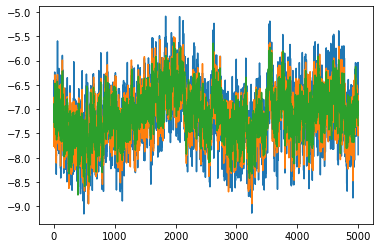

In [26]:
plt.plot(res_dict['noise']['0.1'][7])
plt.plot(res_dict['inst']['0.1'][7])
plt.plot(res_dict['rv']['0.1'][7])